In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Write a sample file to Google Drive
with open('/content/drive/My Drive/ML + Robotics/sample.txt', 'w') as f:
  f.write('Hello, World!')

Mounted at /content/drive


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.style.use('fivethirtyeight')

import os
import numpy as np

In [4]:
os.listdir('/content/drive/My Drive/ML + Robotics/')

['Student-Teacher Distillation Explained.md',
 'vit_normal_batchstats_20250706_204416.csv',
 'vit_normal_epochstats_20250706_204416.csv',
 'vit_normal_20250706_204416.pt',
 'Study outline.gdoc',
 'sample.txt',
 'vit_normal_batchstats_20250709_131843.csv',
 'vit_normal_epochstats_20250709_131843.csv',
 'vit_normal_20250709_131843.pt',
 'vit_student_batchstats_20250709_150544.csv',
 'vit_student_epochstats_20250709_150544.csv',
 'vit_normal_20250709_150544.pt',
 'ViT_distill.ipynb',
 'EDA.ipynb']

In [8]:
file_prefix = '/content/drive/My Drive/ML + Robotics/'

batch_col_names = ['epoch_values', 'iters', 'train_losses', 'train_acc']
epoch_col_names = ['epoch_idx', 'train_epoch_losses', 'train_epoch_acc', 'test_epoch_acc']

vn_batchstats = pd.read_csv(file_prefix + 'vit_normal_batchstats_20250706_204416.csv', names=batch_col_names)
vn_epochstats = pd.read_csv(file_prefix + 'vit_normal_epochstats_20250706_204416.csv', names=epoch_col_names)

vs_batchstats = pd.read_csv(file_prefix + 'vit_student_batchstats_20250709_150544.csv', names=batch_col_names)
vs_epochstats = pd.read_csv(file_prefix + 'vit_student_epochstats_20250709_150544.csv', names=epoch_col_names)

In [85]:
file_prefix

'/content/drive/My Drive/ML + Robotics/'

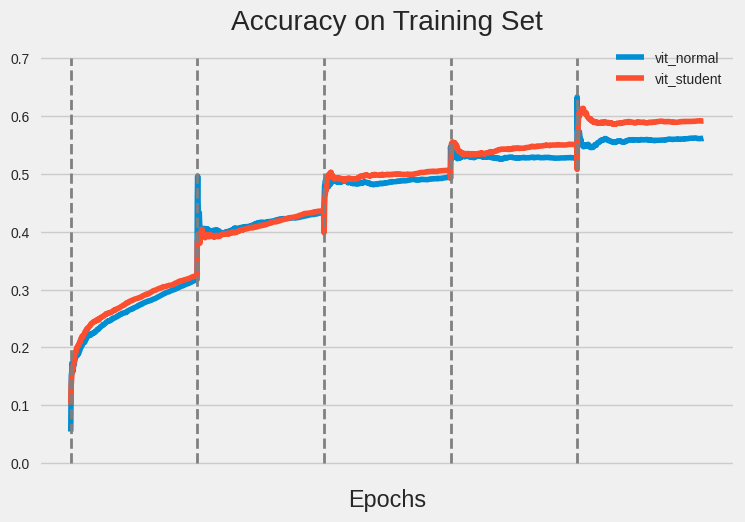

In [86]:
x = np.arange(vs_batchstats.shape[0])
fig, ax = plt.subplots()
ax.plot(
    x,
    vn_batchstats.loc[vn_batchstats.epoch_values < 5]['train_acc'].to_numpy(),
    label='vit_normal'
)
ax.plot(
    x,
    vs_batchstats.loc[vs_batchstats.epoch_values < 5]['train_acc'].to_numpy(),
    label='vit_student'
)

#vertical epoch lines
batches_per_epoch = vs_batchstats.loc[vs_batchstats.epoch_values == 0].shape[0]
ax.vlines(
    np.arange(5) * batches_per_epoch,
    ymin=0,
    ymax=0.7,
    linestyle='--',
    linewidth=2,
    colors='grey'
)

plt.title('Accuracy on Training Set')
plt.xlabel("Epochs")
ax.set_xticks([])
plt.legend()

plt.savefig(file_prefix+'trainset_acc.png')
plt.show()

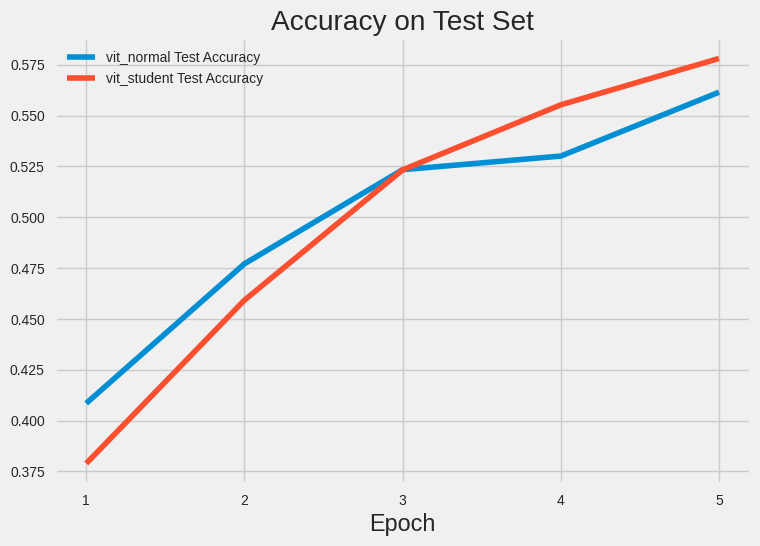

In [87]:
#show test epoch accuracy
x = np.arange(5) + 1
fig, ax = plt.subplots()
ax.plot(
    x,
    vn_epochstats.loc[vn_epochstats.epoch_idx < 5]['test_epoch_acc'],
    label='vit_normal Test Accuracy'
)
ax.plot(
    x,
    vs_epochstats.loc[vs_epochstats.epoch_idx < 5]['test_epoch_acc'],
    label='vit_student Test Accuracy'
)

ax.xaxis.set_major_locator(ticker.MaxNLocator(5))
ax.set_xlabel("Epoch")

plt.title('Accuracy on Test Set')
plt.style.use('fivethirtyeight')
plt.legend()

plt.savefig(file_prefix+'testset_acc.png')
plt.show()


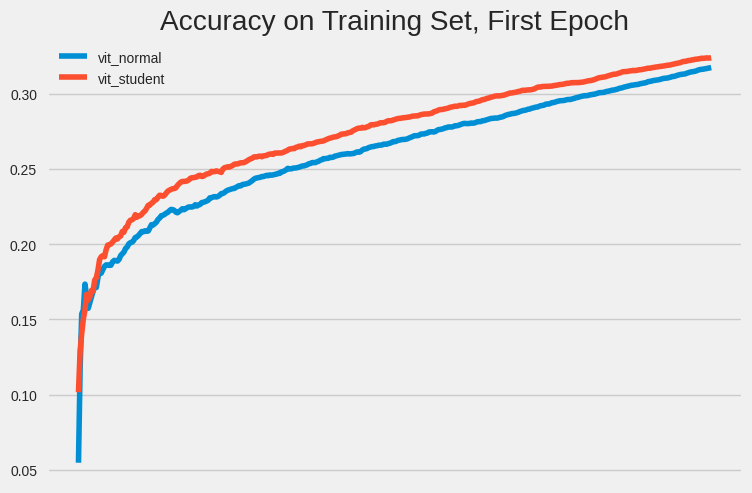

In [88]:
#zoom in on first epoch
x = np.arange(vs_batchstats.loc[vs_batchstats.epoch_values < 1].shape[0])
fig, ax = plt.subplots()
ax.plot(
    x,
    vn_batchstats.loc[vn_batchstats.epoch_values < 1]['train_acc'].to_numpy(),
    label='vit_normal'
)
ax.plot(
    x,
    vs_batchstats.loc[vs_batchstats.epoch_values < 1]['train_acc'].to_numpy(),
    label='vit_student'
)

plt.title('Accuracy on Training Set, First Epoch')
ax.set_xticks([])
plt.legend()

plt.savefig(file_prefix+'trainset_acc_epoch1.png')
plt.show()

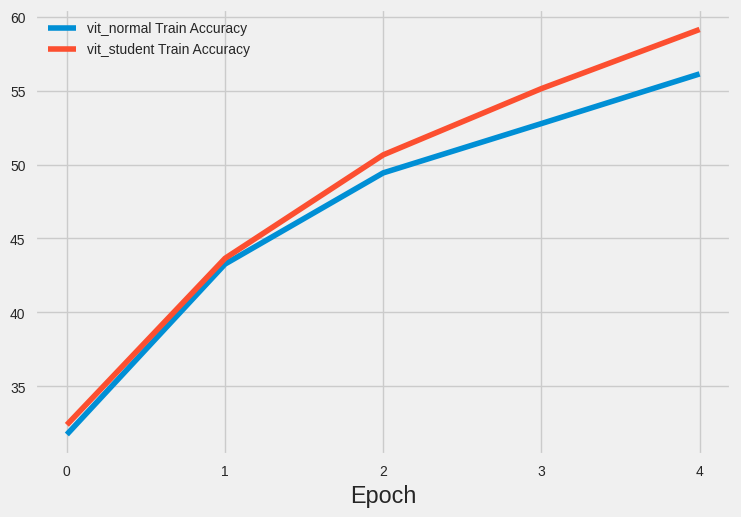

In [52]:
x = np.arange(5)
fig, ax = plt.subplots()
ax.plot(
    x,
    vn_epochstats.loc[vn_epochstats.epoch_idx < 5]['train_epoch_acc'],
    label='vit_normal Train Accuracy'
)
ax.plot(
    x,
    vs_epochstats.loc[vs_epochstats.epoch_idx < 5]['train_epoch_acc'],
    label='vit_student Train Accuracy'
)

ax.xaxis.set_major_locator(ticker.MaxNLocator(5))
ax.set_xlabel("Epoch")

plt.legend()
plt.show()

